# Plant leaf disease Classification

In [63]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [64]:
from tensorflow.keras.models import Sequential

In [65]:
from tensorflow.keras.layers import Convolution2D

In [66]:
from tensorflow.keras.layers import MaxPooling2D

In [67]:
from tensorflow.keras.layers import Flatten

In [68]:
from tensorflow.keras.layers import Dense

In [69]:
import warnings
warnings.filterwarnings('ignore')

In [70]:
Classifier=Sequential()

In [71]:
Classifier.add(Convolution2D(32,3,3,input_shape=(225,225,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Convolution2D(128,3,3,activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Flatten())
Classifier.add(Dense(256, activation='relu'))
Classifier.add(Dense(10, activation='softmax'))

Classifier.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
Classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 75, 75, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 128)       36992     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 4608)              0         
                                                                 
 dense_4 (Dense)             (None, 256)              

In [72]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [73]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [74]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [75]:
training_set=train_datagen.flow_from_directory('dataset/Train',target_size=(225,225),batch_size=32,class_mode='categorical')

Found 4216 images belonging to 10 classes.


In [76]:
test_set=test_datagen.flow_from_directory('dataset/Test',target_size=(225,225),batch_size=32,class_mode='categorical')

Found 909 images belonging to 10 classes.


In [77]:
from IPython.display import display

In [78]:
epochs = 20
batch_size = 32

In [79]:
history = Classifier.fit_generator( training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs,  
           validation_data=test_set,validation_steps=test_set.samples // batch_size)

Epoch 1/20
131/131 [==============================] - 48s 360ms/step - loss: 1.5668 - accuracy: 0.4422 - val_loss: 0.8908 - val_accuracy: 0.6987
Epoch 2/20
131/131 [==============================] - 46s 354ms/step - loss: 0.8344 - accuracy: 0.7139 - val_loss: 0.5874 - val_accuracy: 0.7924
Epoch 3/20
131/131 [==============================] - 47s 358ms/step - loss: 0.6123 - accuracy: 0.7861 - val_loss: 0.7547 - val_accuracy: 0.7690
Epoch 4/20
131/131 [==============================] - 46s 354ms/step - loss: 0.5173 - accuracy: 0.8205 - val_loss: 0.3756 - val_accuracy: 0.8750
Epoch 5/20
131/131 [==============================] - 46s 354ms/step - loss: 0.4326 - accuracy: 0.8478 - val_loss: 0.1869 - val_accuracy: 0.9375
Epoch 6/20
131/131 [==============================] - 46s 354ms/step - loss: 0.3570 - accuracy: 0.8776 - val_loss: 0.2054 - val_accuracy: 0.9275
Epoch 7/20
131/131 [==============================] - 46s 352ms/step - loss: 0.3191 - accuracy: 0.8932 - val_loss: 0.2852 - val_ac

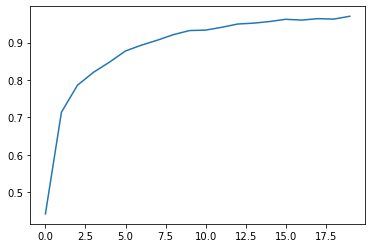

In [82]:
plt.plot(history.history['accuracy'])
plt.show()

In [33]:
import matplotlib.pyplot as plt

In [83]:
def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

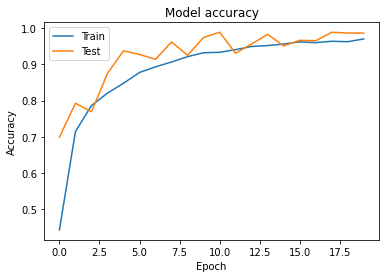

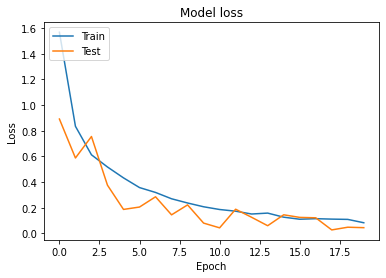

In [84]:
graph()

In [18]:
import h5py 

In [19]:
Classifier.save('plant1.h5')

In [106]:
from keras.models import load_model

In [108]:
model=load_model('plant1.h5')

In [109]:
import numpy as np

In [110]:
from tensorflow.keras.preprocessing import image
test_image=image.load_img('gd.jpg',target_size=(225,225))

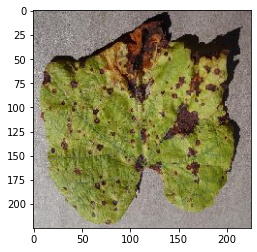

In [111]:
import matplotlib.pyplot as plt
img = plt.imshow(test_image)

In [112]:
test_image=image.img_to_array(test_image)

In [113]:
test_image=np.expand_dims(test_image,axis=0)

In [126]:
result=model.predict(test_image)

In [130]:
y_pred = model.predict(test_image)
print(y_pred.shape)
y_pred[:10]



(1, 10)


array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [133]:
result

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [131]:
prediction = result[0]

In [117]:
classes=training_set.class_indices

In [118]:
classes

{'Apple Disease': 0,
 'Apple healthy': 1,
 'Cherry Disease': 2,
 'Cherry healthy': 3,
 'Grape Disease': 4,
 'Grape healthy': 5,
 'Peach Bacterial': 6,
 'Peach healthy': 7,
 'Strawberry Disease': 8,
 'Strawberry healthy': 9}

In [119]:
prediction=list(prediction)

In [120]:
prediction

[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [34]:
classes=['Apple Disease','Apple healthy','Cherry Disease','Cherry healthy','Grape Disease','Grape healthy','Peach Bacterial','Peach healthy','Strawberry Disease','Strawberry healthy']

In [35]:
output=zip(classes,prediction)

In [36]:
output=dict(output)

In [37]:
output

{'Apple Disease': 0.0,
 'Apple healthy': 0.0,
 'Cherry Disease': 0.0,
 'Cherry healthy': 0.0,
 'Grape Disease': 1.0,
 'Grape healthy': 0.0,
 'Peach Bacterial': 0.0,
 'Peach healthy': 0.0,
 'Strawberry Disease': 0.0,
 'Strawberry healthy': 0.0}

In [38]:
if output['Apple Disease']==1.0 :
    print('Apple Disease')
elif output['Apple healthy']==1.0:
    print('Apple healthy')
elif output['Cherry Disease']==1.0:
    print("Cherry Disease")
elif output['Cherry healthy']==1.0:
    print("Cherry healthy")
elif output['Grape Disease']==1.0:
    print("Grape Disease")
elif output['Grape healthy']==1.0:
    print('Grape healthy')
elif output['Peach Bacterial']==1.0:
    print("Peach Bacterial")
elif output['Peach healthy']==1.0:
    print("Peach healthy")
elif output['Strawberry Disease']==1.0:
    print('Strawberry Disease')
elif output['Strawberry healthy']==1.0:
    print("Strawberry healthy")

Grape Disease
